# <span style="font-family:Georgia; text-align:center;"> Coordenadas polares y ciclos límite</span> 


## <span style="font-family:Georgia; text-align:center;"> Polares y modelado en el plano</span>   
<span style="font-family:Georgia;">

Si un sistema en el plano está dado por
$$
\begin{aligned}
x' &= f(x,y),\\
y' &= g(x,y),
\end{aligned}
$$

La transformación a polares es mediante
$$
x = r\cos\theta,\quad y = r\sin\theta,\quad r^2 = x^2+y^2,\quad \theta = \operatorname{arctan}\left(\frac yx\right).
$$


entonces, derivadando las últimas dos expresiones respecto a $t$ y usando la regla de la cadena, se obtienen las **ecuaciones en polares**:
$$
\boxed{
\begin{aligned}
r' &= \frac{x\,x' + y\,y'}{r},\\[2mm]
\theta' &= \frac{x\,y' - y\,x'}{r^2},
\end{aligned}}
\qquad (r>0).
$$

En sentido inverso, si el sistema está **dado en polares** como
$$
\boxed{
\begin{aligned}
r' &= G(r,\theta),\\
\theta' &= \Omega(r,\theta),
\end{aligned}}
$$
entonces las derivadas cartesianas se obtienen de
$$
\boxed{
\begin{aligned}
x' &= r'\cos\theta - r\sin\theta\,\theta',\\
y' &= r'\sin\theta + r\cos\theta\,\theta'.\\
\end{aligned}}
$$

> **Observación.** Por convención $r\ge 0$ y $\theta$ es el ángulo modulo $2\pi$. 


## <span style="font-family:Georgia; text-align:center;"> Puntos fijos de r' y ciclos límite</span>   
<span style="font-family:Georgia;"> 

Considere el sistema en polares 
$$

\begin{aligned}
r' &= G(r,\theta)= r(1-r),\\
\theta' &= \Omega(r,\theta)= -1,
\end{aligned}
$$
> Observación:  El sentido de giro lo determina el signo de $\theta'$: 
> - $\theta'>0$ implica giro antihorario 
> - $\theta'<0$ implica giro horario.

Los equilibrios radiales $r^\ast>0$ son los puntos tales que $$G(r^\ast)=r(1-r)=0.$$ Entonces los equilibrios son $r=0$ y $r=1$.

Como $G(r)=r(1-r)$ tiene derivada $G'(r)=1-2r$, entonces
- $G'(0)=1>0$ (el equilibrio $r=0$ es **inestable**) 
- $G'(1)=-1<0$ (el equilibrio $r=1$ es **estable**). 

Por lo tanto:
- Si $0<r(0)<1$(la condición incial $r_0\in(0,1)$), entonces $r(t)$ **aumenta** y tiende a $1$.
- Si $r(0)>1$, entonces $r(t)$ **disminuye** y tiende a $1$.
- En ambos casos, las trayectorias son atraídas hacia el **anillo** $r=1$.

La parte angular es
$$
\theta'=-1\neq 0,
$$
lo que implica **giro constante en sentido horario**. Sobre $r=1$ el radio permanece fijo y el ángulo evoluciona como $\theta(t)=\theta_0 - t$ (mód $2\pi$), de modo que la circunferencia $r=1$ es una **órbita periódica**. A este tipo de trayectorias las conocemos como **Ciclos Límite**.

Para graficar en cartesianas, usamos $x=r\cos\theta$, $y=r\sin\theta$ y la identidad $\dfrac{r'}{r}=1-r$ (válida para $r>0$); así
$$
x'=(1-r)\,x + y,\qquad
y'=(1-r)\,y - x,\qquad r=\sqrt{x^2+y^2}.
$$
Estas ecuaciones muestran que, salvo en el origen, las trayectorias **espiralan** hacia el círculo unitario mientras rotan en sentido horario. El origen $(x,y)=(0,0)$ corresponde a $r=0$ y es un equilibrio **inestable** (cualquier perturbación radial empuja la órbita fuera del origen).

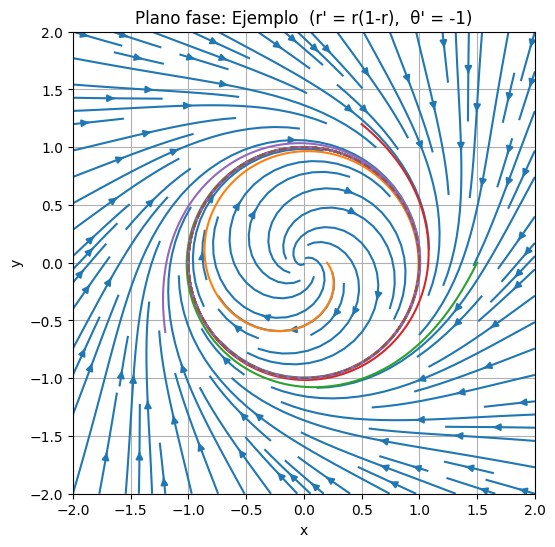

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Campo vectorial para el Ejemplo ----------
def campo_B_xy(x, y):
    r = np.hypot(x, y)
    factor = 1.0 - r  # r'/r = 1 - r
    fx = factor * x + y   # theta' = -1
    fy = factor * y - x
    return fx, fy

# Malla para streamplot
X = np.linspace(-2.0, 2.0, 31)
Y = np.linspace(-2.0, 2.0, 31)
XX, YY = np.meshgrid(X, Y)
UU, VV = campo_B_xy(XX, YY)

fig = plt.figure(figsize=(6, 6))
ax = plt.gca()
strm = ax.streamplot(XX, YY, UU, VV, density=1.2, arrowsize=1)
ax.set_title("Plano fase: Ejemplo  (r' = r(1-r),  θ' = -1)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")
ax.grid(True)

# Trayectorias por integración numérica (RK4) hacia el ciclo límite r=1
def rk4(F, y0, t0, h, n):
    y = np.array(y0, dtype=float)
    traj = [y.copy()]
    t = t0
    for _ in range(n):
        k1 = np.array(F(t, y))
        k2 = np.array(F(t + 0.5*h, y + 0.5*h*k1))
        k3 = np.array(F(t + 0.5*h, y + 0.5*h*k2))
        k4 = np.array(F(t + h, y + h*k3))
        y = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        traj.append(y.copy())
        t += h
    return np.array(traj)

def F(t, Y):
    x, y = Y
    r = np.hypot(x, y)
    factor = 1.0 - r
    fx = factor * x + y
    fy = factor * y - x
    return np.array([fx, fy])

# Puntos iniciales en varias regiones
inits = [(0.2, 0.0), (1.5, 0.0), (0.5, 1.2), (-1.2, -0.6)]
for y0 in inits:
    T = 18.0
    h = 0.02
    n = int(T/h)
    traj = rk4(F, y0, 0.0, h, n)
    ax.plot(traj[:,0], traj[:,1])

# Dibujar la circunferencia r=1
theta = np.linspace(0, 2*np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), linestyle="--")

plt.show()


### <span style="font-family:Georgia; text-align:center;"> Ejercicios</span>   
<span style="font-family:Georgia;"> 

1. Considere $r' = r(\mu - r)$, $\theta' = \omega$ con constantes $\mu,\omega\ne 0$.
   - (a) Clasifique el equilibrio radial $r=0$ y el de $r=\mu$ (si $\mu>0$).
   - (b) ¿Para qué valores de $\mu$ hay ciclo límite? ¿Es estable o inestable?
   - (c) Grafique el plano fase para $\mu=2$ y $\omega=1$ con `streamplot`.



<span style="font-family:Georgia;"> 

#### Solución
Considere
$$
r' = r(\mu - r),\qquad \theta' = \omega,\qquad \mu,\omega\ne 0.
$$

**(a) Clasificación radial.**  
La dinámica radial es $r' = G(r)=r(\mu-r)$ con derivada $G'(r)=\mu-2r$.
- En $r=0$: $G'(0)=\mu$.  
  - Si $\mu>0$, $r=0$ es **inestable** (sale del origen).  
  - Si $\mu<0$, $r=0$ es **estable** (entra al origen).  
  - Si $\mu=0$, $r'=-r^2$ y $r=0$ es **estable no hiperbólico**.
- En $r=\mu$ (solo si $\mu>0$): $G'(\mu)=-\mu<0$, por lo que $r=\mu$ es **estable**.

**(b) Ciclo límite.**  
Existe un ciclo límite si hay un equilibrio radial **positivo** $r^\ast>0$ y, además, $\theta'$ no se anula. Aquí $r^\ast=\mu$ existe $\iff \mu>0$ y sobre $r=\mu$ tenemos $\theta'=\omega\ne 0$. Por tanto, hay un **ciclo límite estable** en $r=\mu$ **si y solo si** $\mu>0$.

**(c) Plano fase.**  
En cartesianas, usando $\dfrac{r'}{r}=\mu-r$ (para $r>0$),
$$
x'=(\mu-r)\,x-\omega\,y,\qquad y'=(\mu-r)\,y+\omega\,x,\qquad r=\sqrt{x^2+y^2}.
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, VBox, HBox, interactive_output

def graficar_ej1(mu=2.0, omega=1.0, lim=3.0):
    X = np.linspace(-lim, lim, 33)
    Y = np.linspace(-lim, lim, 33)
    XX, YY = np.meshgrid(X, Y)
    r = np.hypot(XX, YY)
    factor = mu - r
    UU = factor * XX - omega * YY
    VV = factor * YY + omega * XX

    plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.streamplot(XX, YY, UU, VV, density=1.2, arrowsize=1.0)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"$r'=r(μ-r)$, $θ'=ω$ \n μ={mu:.2f}, ω={omega:.2f}")
    if mu > 0:
        t = np.linspace(0, 2*np.pi, 400)
        ax.plot(mu*np.cos(t), mu*np.sin(t), linestyle='--', label='r=μ (ciclo)')
        ax.legend()
    ax.grid(True)
    plt.show()

s_mu = FloatSlider(value=2.0, min=-2.0, max=3.0, step=0.1, description='μ')
s_om = FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.1, description='ω')
s_lim = FloatSlider(value=3.0, min=1.5, max=6.0, step=0.5, description='lim')

out = interactive_output(graficar_ej1, {'mu': s_mu, 'omega': s_om, 'lim': s_lim})
VBox([VBox([s_mu, s_om, s_lim]), out])


<span style="font-family:Georgia;"> 

2. Tome $r' = r(1-r)(r-a)$ con $a\in(0,1)$ y $\theta'=-1$. Describa la bifurcación cuando $a$ atraviesa $0$ o $1$ y dibuje el plano fase para un par de valores.

<span style="font-family:Georgia;">

### Solución
**Equilibrios radiales:** $r=0$, $r=a$ y $r=1$. El signo de
$$
G(r)=r(1-r)(r-a)
$$
muestra la estabilidad (para $r\ge 0$):
- Si $0<r<a$: $G(r)<0$ (decrece) $\Rightarrow$ se acerca a $r=0$.
- Si $a<r<1$: $G(r)>0$ (crece) $\Rightarrow$ se aleja de $r=a$ y va hacia $r=1$.
- Si $r>1$: $G(r)<0$ (decrece) $\Rightarrow$ se acerca a $r=1$.

Por tanto, para $a\in(0,1)$:  
- $r=0$ es **estable**,  
- $r=a$ es **inestable**,  
- $r=1$ es **estable**.

Como $\theta'=-1\ne 0$, toda circunferencia $r=r^\ast>0$ con $G(r^\ast)=0$ y estable corresponde a un **ciclo periódico**; así, $r=1$ es un **ciclo límite estable** (el origen $r=0$ no es un ciclo, sino un punto fijo).

**Bifurcaciones al variar $a$.**
- Al atravesar $a=0$: el cero $r=a$ colisiona con $r=0$ (raíz doble en $r=0$ cuando $a=0$), cambiando la estabilidad del origen:  
  - Para $a<0$: $r=0$ es **inestable**, $r=1$ **estable**.  
  - Para $a>0$: $r=0$ pasa a **estable** y emerge un equilibrio **inestable** en $r=a>0$.  
- Al atravesar $a=1$: $r=a$ colisiona con $r=1$ (raíz doble en $r=1$ cuando $a=1$) e **intercambian estabilidad**:  
  - Para $a<1$: $r=1$ **estable**, $r=a$ **inestable**.  
  - Para $a>1$: $r=1$ **inestable**, aparece un equilibrio **estable** en $r=a>1$.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, VBox, HBox, interactive_output

def campo_ej2_xy(x, y, a):
    r = np.hypot(x, y)
    factor = (1.0 - r) * (r - a)  # r'/r (para r>0)
    fx = factor * x + y           # theta' = -1
    fy = factor * y - x
    return fx, fy

def graficar_ej2(a=0.5, lim=2.5):
    X = np.linspace(-lim, lim, 33)
    Y = np.linspace(-lim, lim, 33)
    XX, YY = np.meshgrid(X, Y)
    UU, VV = campo_ej2_xy(XX, YY, a)

    plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.streamplot(XX, YY, UU, VV, density=1.2, arrowsize=1.0)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"r'=r(1-r)(r-a), $θ'=-1$ \n a={a:.2f}")
    t = np.linspace(0, 2*np.pi, 400)
    if a > 0:
        ax.plot(a*np.cos(t), a*np.sin(t), linestyle='--', label='r=a')
    ax.plot(np.cos(t), np.sin(t), linestyle='-.', label='r=1')
    ax.legend()
    ax.grid(True)
    plt.show()

s_a = FloatSlider(value=0.5, min=-0.5, max=1.5, step=0.05, description='a')
s_lim2 = FloatSlider(value=2.5, min=1.5, max=5.0, step=0.5, description='lim')
out2 = interactive_output(graficar_ej2, {'a': s_a, 'lim': s_lim2})
VBox([HBox([s_a, s_lim2]), out2])
